In this notebook, we introduce:

- **Linear Regression** as __single layer, single neuron model__ to motivate the introduction of Neural Networks as Universal Approximators that are modeled as collections of neurons connected in an acyclic graph


- __Convolutions__ and examples of simple __image filters__ to motivate the construction of __Convolutionlal Neural Networks.__


- Loss/Error functions, Gradient Decent, Backpropagation, etc

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## One Neuron Neural Network

<img src="images/Neuron.png">

[src: [CS231n](http://cs231n.stanford.edu/)]

We're going to model a straight line Linear Regression (i.e fitting to $y = mx +b$) as a 1 neuron NN. First let's generate some noisy data that we'll try to fit to using our one neuron neural network (a.k.a Linear Regression) 

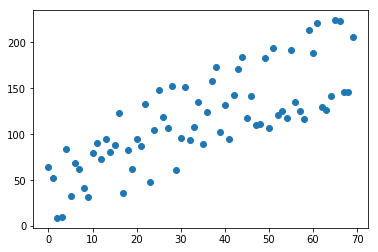

In [2]:
X = np.arange(0,70, 1)
Y = 2*X
noise = 100*np.random.rand(70) 
Y = Y + noise

plt.scatter(X, Y)
plt.show()

The parameters of our network are the number m and b which we randomly initiate, and prediction is give by:

\begin{align}
\ \tilde{y_i} &= mx_i + b \\
\end{align}


For the loss function we use the standard Mean Squared Error:

\begin{align}
\ L & = \frac{1}{N} \sum_{k=1}^N (y_k - \tilde{y_k})^2 \\
\end{align}


The Batch Gradient Decent step is given by (_notice we are using the entire dataset as a batch_):

\begin{align}
\ m &= m - \alpha \frac{dL}{dm} \\
\ b &= b - \alpha \frac{dL}{db} \\
\end{align}

where $\alpha$ is the learning rate, and the gradients are given by: 

\begin{align}
\ \frac{dL}{dm} &= -\frac{2}{N} \sum_{k=1}^N x_k(y_k - \tilde{y_k})\\
\end{align}
\begin{align}
\ \frac{dL}{db} &= -\frac{2}{N} \sum_{k=1}^N (y_k - \tilde{y_k})\\
\end{align}

Random guess for m and b: (array([0.12245137]), array([0.1676351]))


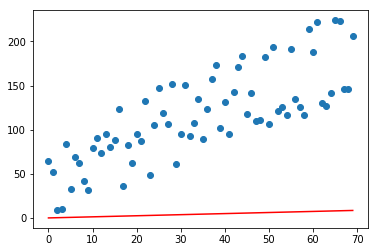

In [3]:
m = np.random.randn(1)
b = np.random.randn(1)
print(f'Random guess for m and b:',(m,b))

# Initial random prediction
Y_pred = m*X + b

plt.scatter(X, Y) 
plt.plot([X[0], X[-1]], [Y_pred[0], Y_pred[-1]], color='red')  # regression line
plt.show()

In [4]:
alpha = 0.0001                             # The learning Rate
epochs = 10000                             # The number of iterations to perform gradient descent

n = float(len(X))                          # Number of elements in X

# Training the Neural Net
for i in range(epochs): 
    Y_pred = m*X + b                       # The current predicted value of Y
    Loss = sum((Y - Y_pred )**2)/n         # Compute loss
    D_m = (-2/n) * sum(X * (Y - Y_pred))   # Derivative wrt m
    D_b = (-2/n) * sum(Y - Y_pred)         # Derivative wrt b
    m = m - alpha * D_m                    # Update m
    b = b - alpha * D_b                    # Update b
    
    if i%1000 == 0:
        print( "Epoch {}, Loss : {}".format(i, Loss))
print( "Epoch {}, Loss : {}".format(i, Loss))

Epoch 0, Loss : 14855.366041101148
Epoch 1000, Loss : 1555.4963885803413
Epoch 2000, Loss : 1501.9892176945377
Epoch 3000, Loss : 1453.676135721832
Epoch 4000, Loss : 1410.0529381006588
Epoch 5000, Loss : 1370.6643647993121
Epoch 6000, Loss : 1335.0993491352012
Epoch 7000, Loss : 1302.9867278043541
Epoch 8000, Loss : 1273.991367350205
Epoch 9000, Loss : 1247.8106666467575
Epoch 9999, Loss : 1224.193852904857


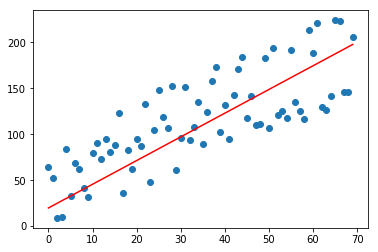

In [5]:
# Making predictions
Y_pred = m*X + b

plt.scatter(X, Y) 
plt.plot([X[0], X[-1]], [Y_pred[0], Y_pred[-1]], color='red')  # regression line
plt.show()

## Neural Networks

An example of a singe _layer_ neural net
<img src='http://cs231n.github.io/assets/imagemap.jpg' alt="multiple dimensions" style="width: 400px;">

<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" alt="nn" style="width: 400px;"/>

Neural Networks are modeled as collections of neurons that are connected in an acyclic graph. In other words, the outputs of some neurons can become inputs to other neurons. Cycles are not allowed since that would imply an infinite loop in the forward pass of a network. Instead of an amorphous blobs of connected neurons, Neural Network models are often organized into distinct layers of neurons. For regular neural networks, the most common layer type is the fully-connected layer in which neurons between two adjacent layers are fully pairwise connected, but neurons within a single layer share no connections. [See: cs231n](http://cs231n.github.io/neural-networks-1/)


<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

Building blocks:

- **Loss Function**: We can measure the accuracy of our hypothesis function by using a cost function. This takes an average of all the results of the hypothesis with inputs from x's compared to the actual output y's. The goal is to minimize this loss/error.



- **Gradient Decent** and **Learning Rate**: So we have our hypothesis function (Neural Net) and we have a way of measuring how well it fits into the data. Now we need to estimate the parameters in hypothesis function (Weights of the Neural Net). The way we do this is by taking the derivative of our cost function. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost function in the direction with the steepest descent, and the size of each step is determined by the parameter α, which is called the learning rate.


- **Backpropagation**: Chain rule from calculus 101 applied to multi-layer neural network (i.e. gradient propagated backwards through the layers). An __n layer neural network__ can simply be seen as:
    
    \begin{align}
    \ \tilde{y_i} &= f_n(W_n... f_2(W_2 f_1(W_1 X))) \\
    \end{align}
    
    where $f_1, f_2, ... f_n$ are the activation functions at each layer, $W_1, W_2, ... W_n$ are matrices of parameters at each layer, and $X$ is the input. Hence to find the gradient of the loss function w.r.t to any parameter one simply needs to apply the chain rule.




- **Optimizer**: Different flavors of gradient decent (more on this later). 


- **Activation Function**: Some non-linear function applied to intermediate layer's outputs before feeding into the next layer.

##  Convolutional Neural Nets (CNNs)

![CNN](https://anhvnn.files.wordpress.com/2018/02/convolve.png?w=1000)

Let's apply a basic convolution on a Gray Scale image. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the corresponding value in the filter, and then sum them up to produce the activation value in the resulting tensor.

In [6]:
import cv2
from scipy import misc

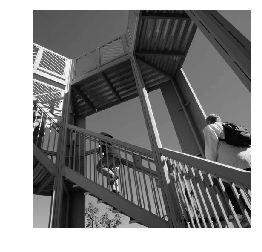

In [7]:
img = misc.ascent()
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(img)
plt.show()

In [8]:
def simple_convolution(img, filter):
    output = np.copy(img)
    size_x, size_y = img.shape
    for x in range(1,size_x-1):
        for y in range(1,size_y-1):
            convolution = 0.0
            convolution = convolution + (img[x - 1, y-1] * filter[0][0])
            convolution = convolution + (img[x, y-1] * filter[0][1])
            convolution = convolution + (img[x + 1, y-1] * filter[0][2])
            convolution = convolution + (img[x-1, y] * filter[1][0])
            convolution = convolution + (img[x, y] * filter[1][1])
            convolution = convolution + (img[x+1, y] * filter[1][2])
            convolution = convolution + (img[x-1, y+1] * filter[2][0])
            convolution = convolution + (img[x, y+1] * filter[2][1])
            convolution = convolution + (img[x+1, y+1] * filter[2][2])
            if(convolution<0):
                convolution=0
            if(convolution>255):
                convolution=255
            output[x, y] = convolution
    return output

In [9]:
#Experiment with different filters to see the effects.

filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]      #vertical edge detector  (bottom sobel )
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]      #horizontal edge detector (right sobel)

#filter = [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]  #outline
#filter = [[0, -1, 0], [-1, 5, -1], [0, -1, 0]]      #sharpen
#filter = [[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]       #emboss

Text(0.5, 1.0, 'Output')

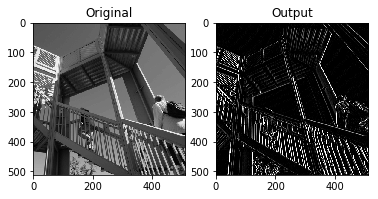

In [10]:
output = simple_convolution(img, filter)

plt.subplot(1,2,1)
plt.imshow(img, 'gray')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(output, 'gray')
plt.title('Output')

The ides is that in a deep convolutional net, the various filters in each layer sort of act like learned filters that extract features from the input image/tensor layer, and its through combination of these features that the network learns to classify images, detect objects, etc

![CNN](http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/images/fig3.png)

**Max Pooling**

<img src="https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png" alt="MaxPooling" style="width: 400px;"/>